# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
from urllib2 import Request, urlopen
import pandas as pd
import json
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import requests
import requests_cache
requests_cache.install_cache("cache")

In [2]:
key = 'CHSng8d56CPW5HwqASxFzM9KsPFjnT3Ho7t3Mb53'

In [3]:
def ndb_search(key, term):
    """
    This takes a key and search term to make a request to the USDA Food Composition Database.
    Input: key (data.gov API key, string), term (search term, string)
    Output: list of search result items (returns empty list for 0 items)
    """
    params = (('format', 'json'),('q', term),('api_key', key))
    url = 'https://api.nal.usda.gov/ndb/search'
    r = requests.get(url, params = params)
    if u'list' in r.json():
        l = r.json()[u'list'][u'item']
        if len(l) == 0:
            return []
    else: 
        return []
    return l

A test of the new function follows:

In [4]:
test1 = ndb_search(key, 'quail eggs')
pd.DataFrame(test)

,ds,group,name,ndbno,offset
0,BL,Branded Food Products Database,"CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186",45094707,0
1,BL,Branded Food Products Database,"L&W, QUAIL EGGS, UPC: 024072000256",45094890,1
2,BL,Branded Food Products Database,"BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098",45099560,2
3,BL,Branded Food Products Database,"GRAN SABANA, QUAIL EGGS, UPC: 819140010103",45169279,3
4,BL,Branded Food Products Database,"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",45178254,4
5,SR,Dairy and Egg Products,"Egg, quail, whole, fresh, raw",01140,5


__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

I first do some testing of my strategy before applying it to the entire data set. 

In [5]:
test2 = ndb_search(key, 'tangerines' + ' raw')
test2df = pd.DataFrame(test2)
test2df.head()

,ds,group,name,ndbno,offset
0,SR,Fruits and Fruit Juices,"Tangerine juice, raw",09221,0
1,SR,Fruits and Fruit Juices,"Tangerines, (mandarin oranges), raw",09218,1


In [6]:
test2df1 = test2df[test2df['ds'] == u'SR']
test2df1.loc[~test2df1.name.str.contains('juice'), :].head()

,ds,group,name,ndbno,offset
1,SR,Fruits and Fruit Juices,"Tangerines, (mandarin oranges), raw",09218,1


In [7]:
fresh = pd.read_csv('fresh.csv')
df = pd.DataFrame()
for food in fresh['food']:
    food = food.replace('_', ' ')
    r = ndb_search(key, food + ' raw')
    food = food.replace(' ', '_')
    if len(r) != 0:
        l = pd.DataFrame(r)
        l = l[l['ds'] == u'SR']
        l = l.loc[~l.name.str.contains('juice'), :]
        l = l[:1] #l[0] does not work 
        l['food'] = food
        l = l[['food','ndbno']]   
    else: 
        l = pd.DataFrame(r)
        l = l.append({'food': food, 'ndbno': 'NA'}, ignore_index = True)
    df = df.append(l)    

We need to check the shape of the new data frame to make sure it matches with the fresh data frame before merging. 

In [8]:
df.shape

(49, 2)

It matches, so we merge the data frames and take a look at the first few rows. 

In [9]:
fresh = pd.merge(fresh, df)
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279


My strategy here is to first use my search function to do a search for each food in the fresh.csv file with the added word "raw" and convert it to a pandas data frame. I had to replace the _ character in the search word "food" that was grabbed from the "food" column because I ran into problems when searching for certain foods, such as red peppers. I then select only the rows that have ds = SR, and then exclude any rows that contain the string "juice" in the name column. I then select the first row, because I know that this will contain both of the words I'm looking for without the word 'juice' (food and raw), and any other rows are most likely just different types of the same food. Once I have the data frame down to only this row, I can then add a column with the name of the food in it, so that I can later merge it with the "fresh" data frame. I then select only the "food" and "ndbno" columns, add them to a data frame, and then lastly merge the resulting data frame with the "fresh" data frame. Any foods with "NA" under the ndbno column did not return any search results in the search query. I've noticed that this is usually due to the food being called something slighly different in the database, like "kiwifruit" instead of "kiwi" or "collards" instead of "collard greens". It would be difficult to code for these inconsistent differences. 

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [10]:
def ndb_report(key, ndbno):
    """
    This takes a key and ndbno to make a request to the USDA Food Composition Database for a basic food report.
    Input: key (data.gov API key, string), ndbno (ndb number, string)
    Output: list of nutrients for the food corresponding to the nbd number (returns empty list for 0 items)
    """
    params = (('ndbno', ndbno),('type', 'b'),('format', 'json'),('api_key', key))
    url = 'https://api.nal.usda.gov/ndb/V2/reports'
    r = requests.get(url, params = params)
    l = r.json()[u'foods'][0][u'food'][u'nutrients']
    return l

A test of the new function follows. 

In [97]:
test3 = ndb_report(key, '09276')
test3

[{u'group': u'Proximates',
  u'measures': [{u'eqv': 173.0,
    u'eunit': u'g',
    u'label': u'cup',
    u'qty': 1.0,
    u'value': u'157.10'},
   {u'eqv': 7.0,
    u'eunit': u'g',
    u'label': u'fruit without refuse',
    u'qty': 1.0,
    u'value': u'6.36'}],
  u'name': u'Water',
  u'nutrient_id': u'255',
  u'unit': u'g',
  u'value': u'90.81'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 173.0,
    u'eunit': u'g',
    u'label': u'cup',
    u'qty': 1.0,
    u'value': u'57'},
   {u'eqv': 7.0,
    u'eunit': u'g',
    u'label': u'fruit without refuse',
    u'qty': 1.0,
    u'value': u'2'}],
  u'name': u'Energy',
  u'nutrient_id': u'208',
  u'unit': u'kcal',
  u'value': u'33'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 173.0,
    u'eunit': u'g',
    u'label': u'cup',
    u'qty': 1.0,
    u'value': u'1.38'},
   {u'eqv': 7.0,
    u'eunit': u'g',
    u'label': u'fruit without refuse',
    u'qty': 1.0,
    u'value': u'0.06'}],
  u'name': u'Protein',
  u'nutrient_id': u'203',

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [43]:
def add_nutrients(fresh, key, col, nutrient):
    """
    Takes search parameters to use for slicing the nutrient data frame from nbd_report,
    then adding the values as columns to the final data frame with all of the data
    from the "fresh" .csv file. 
    Input: fresh(Data Frame object), key(API key, string), 
    col(the column in nutrient data frame to search over, string), 
    nutrient(the nutrient to search for in the col, string)
    Output: final data frame with columns added with nutrient values
    """
    edf = pd.DataFrame()
    for i in range(len(fresh)): 
        if fresh['ndbno'][i] != 'NA':
            r = ndb_report(key, str(fresh['ndbno'][i]))
            rdf = pd.DataFrame(r)
            rdf = rdf[rdf[col] == nutrient] 
            if len(rdf.index) != 0: #checking that there is an entry for this nutrient
                rdf['ndbno'] = fresh['ndbno'][i]
                rdf = rdf[['value', 'ndbno']]
            else: #if not, add a row of NAs as a filler row, so no data is lost
                rdf.loc[len(rdf)]=['NA','NA','NA','NA', 'NA', 'NA']
                rdf['ndbno'] = fresh['ndbno'][i]
                rdf = rdf[['value', 'ndbno']]
        else:
            rdf = pd.DataFrame()
            rdf = rdf.append({'ndbno':'NA', 'value': 'NA'}, ignore_index = True)
        edf = edf.append(rdf) 
    final = pd.merge(fresh, edf)
    final = final.drop_duplicates() 
    final = final.rename(columns = {'value': nutrient}) 
    return final

My strategy here is to iterate over the elements in the 'ndbno' column of the fresh dataframe, use the entry to get the nutrition report, then extract only the nutrient value for whatever I decide to search for (kcal for example). I then use the ndbno number and nutrient value to append to a dataframe and then merge this data frame with the "fresh" dataframe, to obtain my final dataframe that consists of a new column named for that nutrient. For some reason, I end up with duplicate rows, so I have to drop them in the final dataframe. This shouldn't affect the final analysis, as I check that all of the original foods are present. 

Now we get information on calories, protein, and fiber for each food for my analysis. 

In [44]:
kcal = add_nutrients(fresh, key, 'unit', 'kcal')
kcal.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,kcal
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326,30
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181,34
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218,53
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316,32
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279,46


In [45]:
protein = add_nutrients(fresh, key, 'name', 'Protein')
protein.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,Protein
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326,0.61
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181,0.84
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218,0.81
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316,0.67
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279,0.70


In [46]:
fiber = add_nutrients(fresh, key, 'name', 'Fiber, total dietary')
fiber.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,"Fiber, total dietary"
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326,0.4
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181,0.9
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218,1.8
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316,2.0
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279,1.4


In [82]:
final = pd.merge(kcal, protein)
final = pd.merge(final, fiber)
final = final.rename(columns = {'Fiber, total dietary': 'Fiber'}) 
final = final.replace('NA', 0) #replace NA's with 0 for plotting purposes
final.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,kcal,Protein,Fiber
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326,30,0.61,0.4
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181,34,0.84,0.9
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218,53,0.81,1.8
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09316,32,0.67,2.0
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09279,46,0.70,1.4


We make sure nothing was lost in the process of eliminating duplicates. 

In [83]:
final.shape

(49, 11)

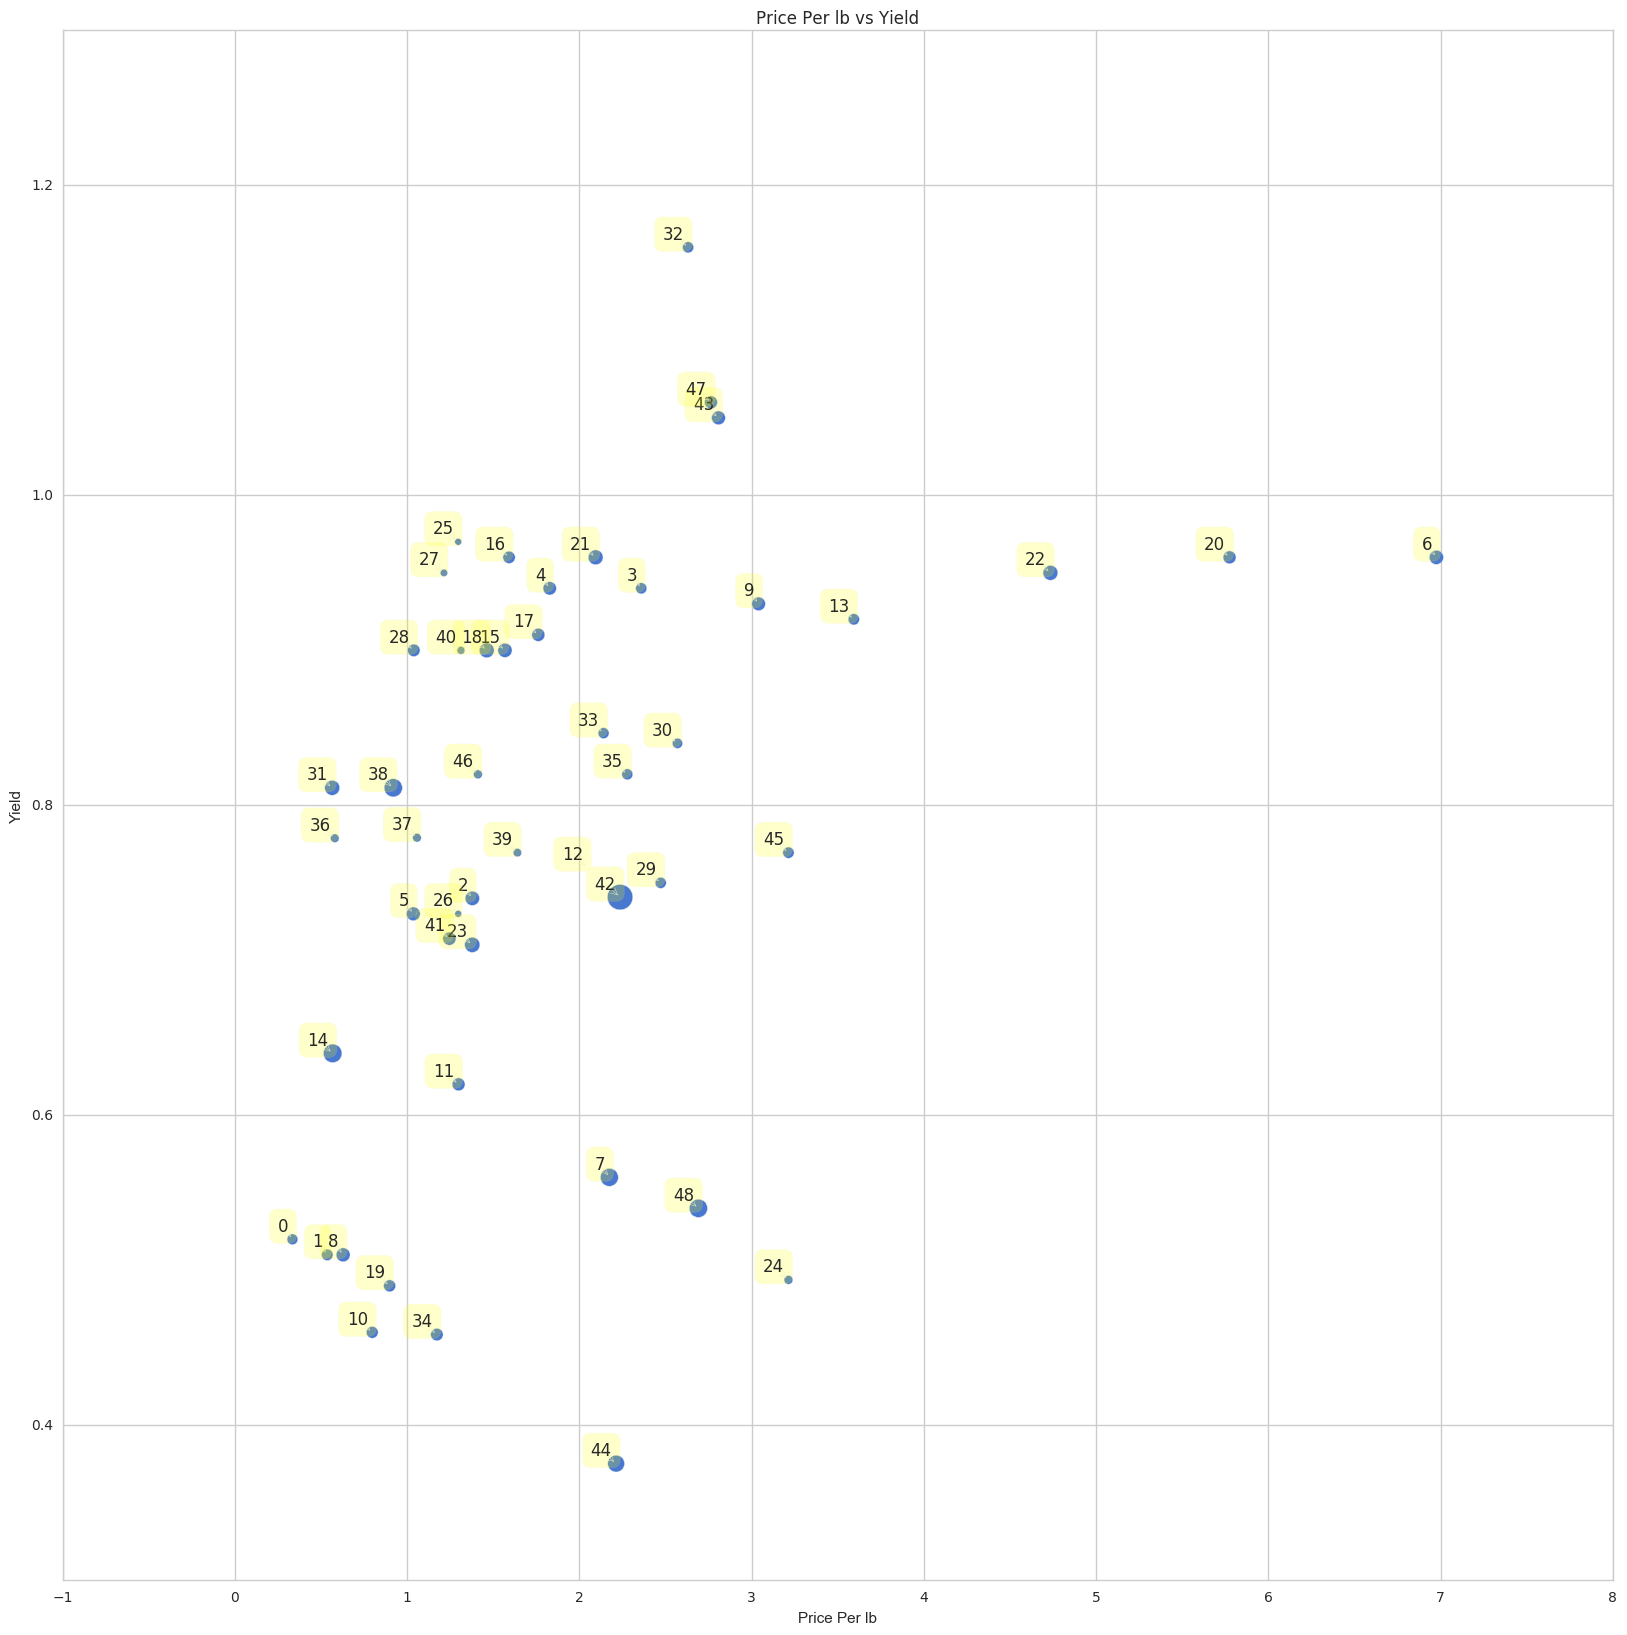

In [84]:
a = final['price_per_lb']
b = final['yield']
z = pd.to_numeric(final['kcal'], errors = 'coerce')
labels = final.index

plt.figure(figsize=(20,20))
plt.scatter(
    a, b, marker='o', s=z*2,
    cmap=plt.get_cmap('Spectral'))
plt.xlabel('Price Per lb')
plt.ylabel('Yield')
plt.title('Price Per lb vs Yield')

for label, x, y in zip(labels, a, b):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5',fc = 'yellow', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [52]:
print final.ix[42]['food']
print final.ix[14]['food']
print final.ix[31]['food']
print final.ix[38]['food']
print final.ix[18]['food']
print final.ix[21]['food']

avocados
bananas
potatoes
sweet_potatoes
pears
grapes


I chose to use a scatter plot of price per lb vs yield, with each point size weighted by the kcal value as one way of analyzing the data. Each point is also labeled with the index number, so we can easily look up the food it belongs to. This way, we can look for foods with a low price, a high yield, and a large amount of calories. The larger the point, the more calories the food will provide. 

We can see that there are a few points that stand out: 42, 14, 31, 38, 18, 21. They correspond to __avocados, banans, potatoes, sweet potatoes, pears, and grapes__. This makes sense since these foods are all relatively low priced, but provide a lot of calories, and have little relative waste. The yield of potatoes would be higher if the skin were left on during cooking. 

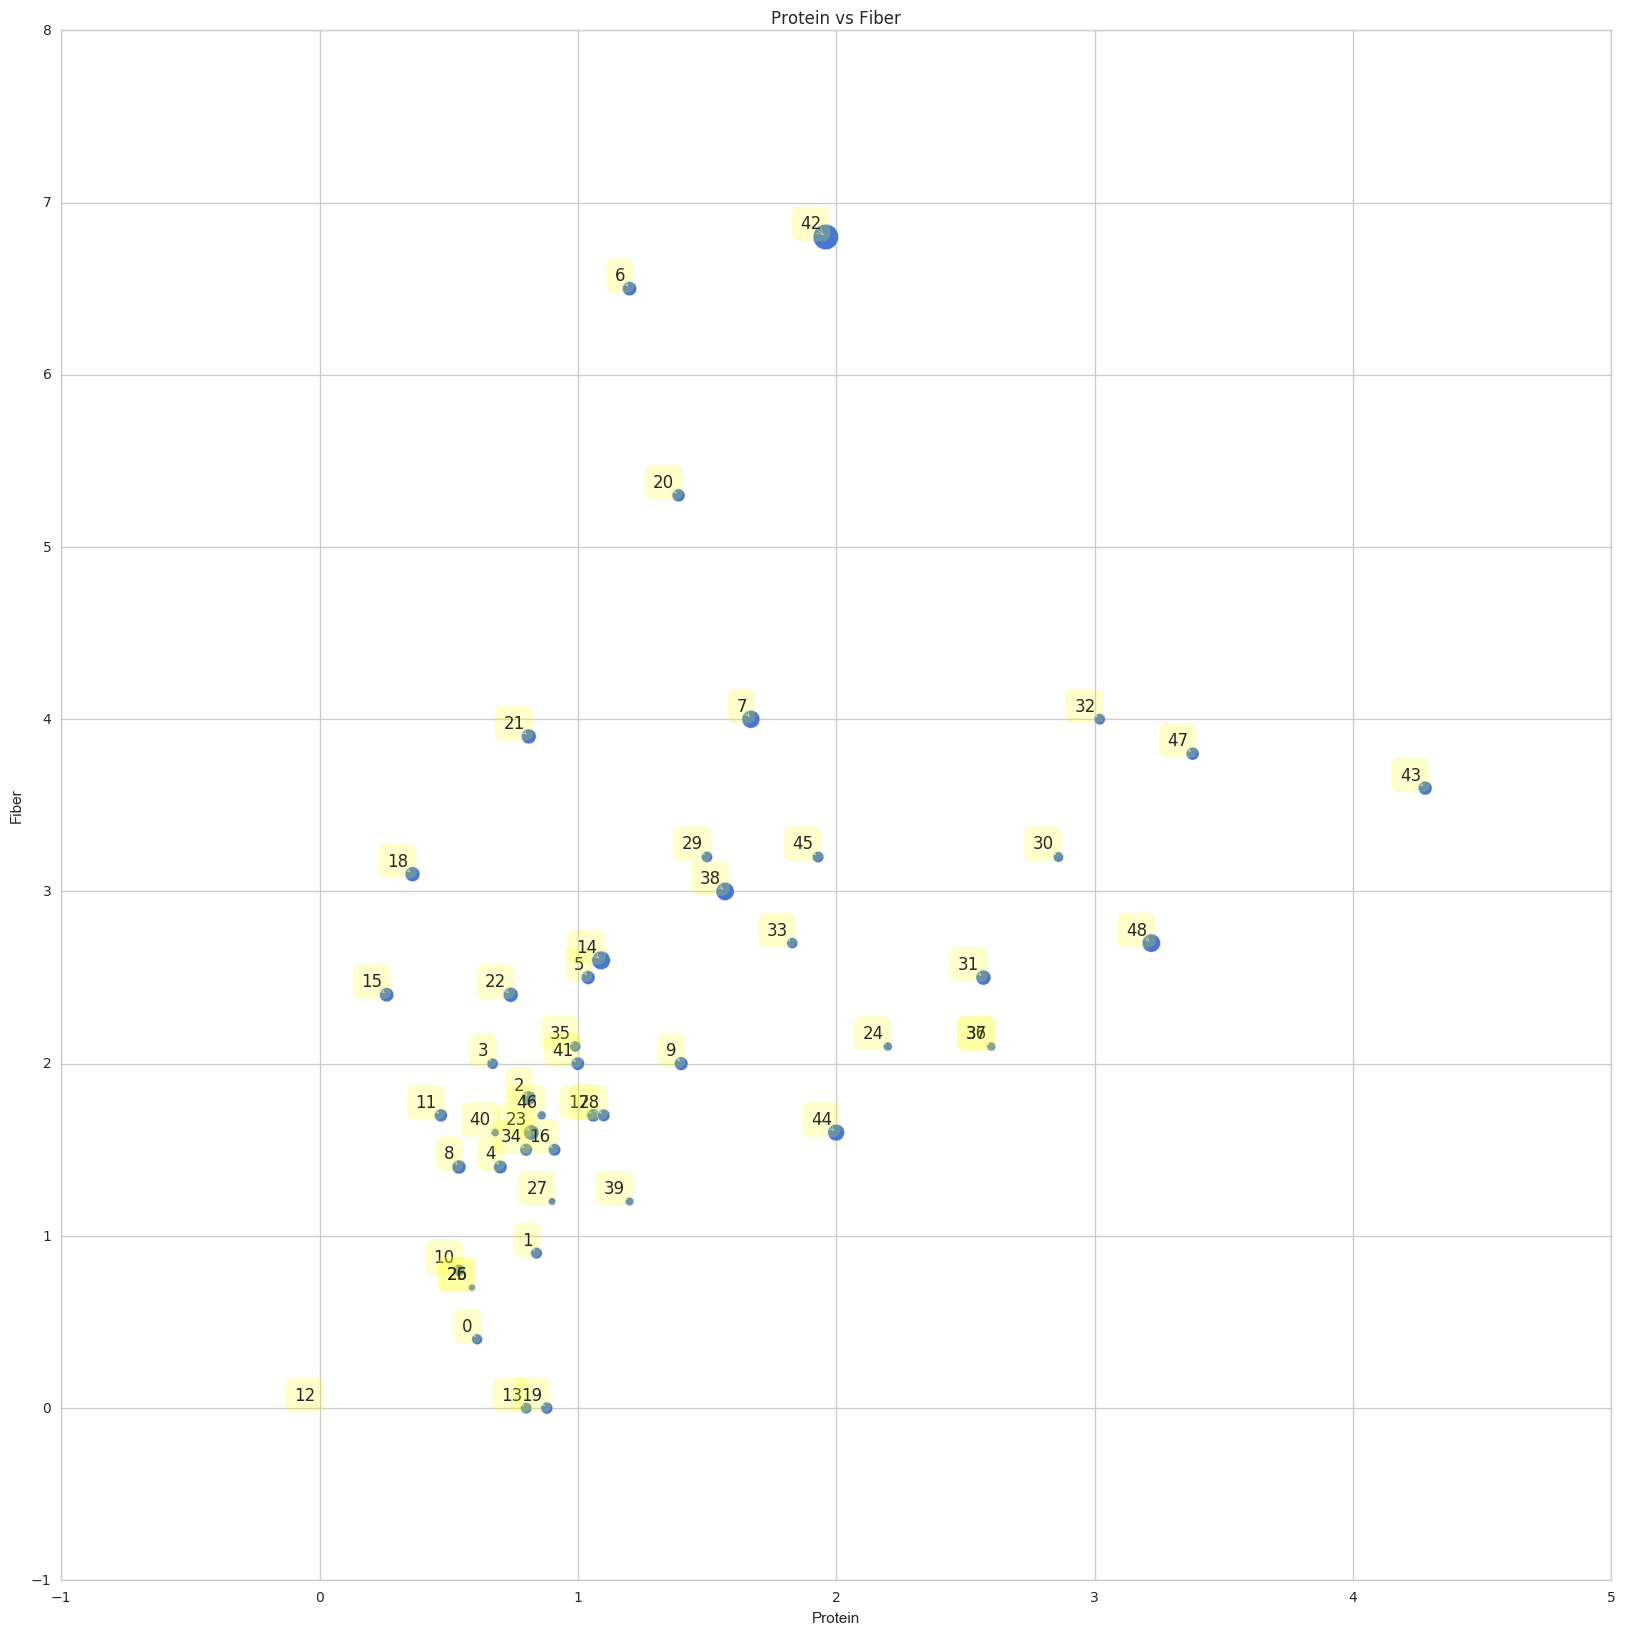

In [86]:
c = final['Protein']
d = final['Fiber']
w = pd.to_numeric(final['kcal'], errors = 'coerce')
labels = final.index

plt.figure(figsize=(20,20))
plt.scatter(
    c, d, marker='o', s=w*2,
    cmap=plt.get_cmap('Spectral'))
plt.xlabel('Protein')
plt.ylabel('Fiber')
plt.title('Protein vs Fiber')

for label, x, y in zip(labels, c, d):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5',fc = 'yellow', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [94]:
print 'high in all 3:'
print final.ix[42]['food']
print final.ix[48]['food']
print final.ix[7]['food']
print 'high in protein, fiber, low in calories:' 
print final.ix[32]['food']
print final.ix[40]['food']
print final.ix[45]['food']

high in all 3:
avocados
corn_sweet
pomegranate
high in protein, fiber, low in calories:
collard_greens
radish
okra


I was also interested in the best combination of protein, fiber, and calories. It seems reasonable that a person would either be looking for foods high in protein, fiber, but low in calories, or foods high in all three measures. This would of course depend on the goals and needs of the individual. 

This graph is similar to the last, where the points are labeled with the index and weighted by calorie content. By examining the graph, we find that some of the foods that are higher in all 3 measures are avocados, sweet corn, and pomegranate, while some foods that are high in protein and fiber, but lower in calories include collard greens, radish, and okra. 

I find this very interesting because many people don't expect to find protein in fruits and vegetables, so it is useful to show the fruits and vegetables that contain the highest amounts of fiber and protein. 

I'm not surpised to find avocados on the list since they are an amazing fruit (technically, right?) that are also high in healthy fats!  

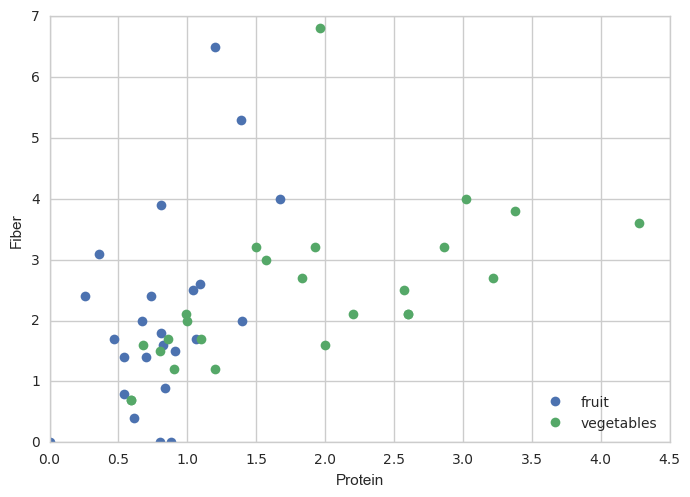

In [87]:
fig, ax = plt.subplots(1, 1)

def scatter(group):
    plt.plot(group["Protein"], group["Fiber"], "o", label = group.name)

final.groupby("type").apply(scatter)
ax.set(xlabel = "Protein", ylabel = "Fiber")
ax.legend(loc = 4)

plt.show()

I was also interested in comparing the overall values of fruits vs vegetables. It appears that vegetables have much more protein than fruits. Fiber content seems to be very similar among the two groups, though there are a few more fruits with higher fiber content than there are vegetables with higher fiber content. 

For comparison, an egg contains 6 grams of protein. Several of the vegetables approach this value (the unit is grams), which would be useful information for a person trying to cut back on animal protein. 

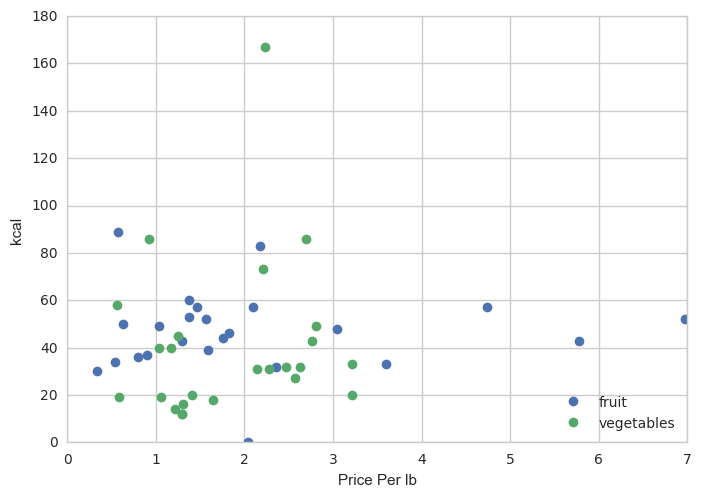

In [88]:
fig, ax = plt.subplots(1, 1)

def scatter(group):
    plt.plot(group["price_per_lb"], group["kcal"], "o", label = group.name)

final.groupby("type").apply(scatter)
ax.set(xlabel = "Price Per lb", ylabel = "kcal")
ax.legend(loc = 4)

plt.show()

It appears that fruits and vegetables are similarly distributed with respect to price per lb and calorie content, witha few outliers. There does appear to be a few fruits on the pricey end. This supports my analysis in the previous assignment, where I found that several of the berries were priced much higher than other fruits. The outlying vegetable on the calorie side is likely the avocado (as we have seen in this analysis). 

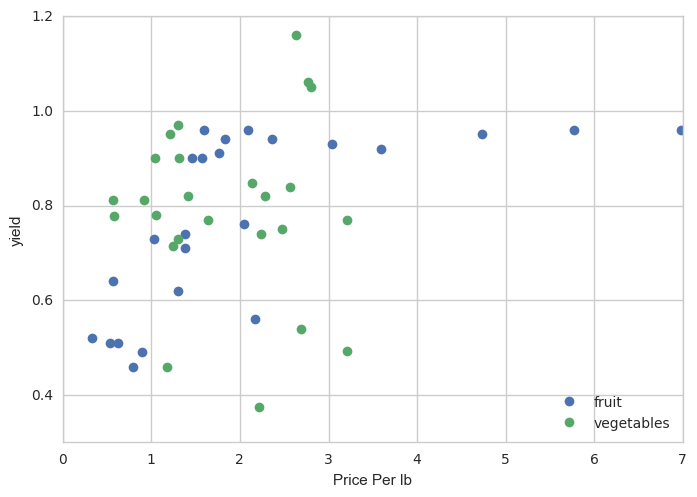

In [89]:
fig, ax = plt.subplots(1, 1)

def scatter(group):
    plt.plot(group["price_per_lb"], group["yield"], "o", label = group.name)

final.groupby("type").apply(scatter)
ax.set(xlabel = "Price Per lb", ylabel = "yield")
ax.legend(loc = 4)

plt.show()

Again, the fruits and vegetables appear to be similarly distributed with respect to price per lb and yield, with the outlying fruits on the price side. The outlying vegetables on the yield side are likely something that is cooked by boiling, explaining the yield greater than 1. 

__Final thoughts__

The data in my dataframe might vary slightly from the true data due to the search techniques. In order to process a large amount of data, I had to use generic simple searches, so the results might not be very precise. For example, there are several types of "apples" and differnt forms of them (skin on or off), however, as long as the search was successful in finding the food with the word "raw", the nutrition data probably won't vary much. 

I did encounter one weird case with red peppers. If you search for it with the underscore symbol, you get only one result: a raw red pepper honey, which has a massive amount of calories, and is definitely not what we want. This is when I changed my code to replace the underscore with a space. I then had to add more steps, including selecting only the rows with the 'SR' symbol and then picking the first of those rows. This seemed to address many of the problems I was facing. 

However, because the kiwi is such a unique issue, requiring a search for "kiwifruit raw", the only way to address this would be to manually input the ndb number, which I did not do. 

Some additional analysis to do with more time available would include looking at the all of the vitamins present in each food, and compare with price, yield, and calories. We could assign a score to the foods based on their vitamin content of a few of the more important vitamins, then plot the results in side by side scatter plots (one like above, the second weighted by vitamin value instead of calories). 